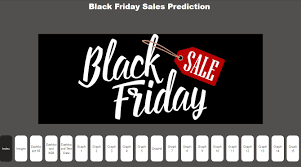

# 1.Importing all the requeried labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# 2. Loading the dataset

In [2]:
dataframe1=pd.read_csv("train.csv")

# 3. checking the some basic operation of data analysis

In [3]:
def basic_operation():
    print(dataframe1.head())
    print(dataframe1.tail())
    print(dataframe1.shape)
    print(dataframe1.info())
    print(dataframe1.describe())
    print(dataframe1.columns)
    
basic_operation()


   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

# 4.Checking the null value in the dataset

In [4]:
dataframe1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
# all the null value getting the top of the dataset
dataframe1.isnull().sum().sort_values(ascending=False)


Product_Category_3            383247
Product_Category_2            173638
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

In [6]:
# checking the null value percentage on the two columns
null_per=(dataframe1.isnull().sum()/len(dataframe1))*100
null_per

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [7]:
dataframe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
dataframe1.drop(columns=['User_ID','Product_ID','Product_Category_3'],axis=1,inplace=True)

# The above dataset is having lot of null values its more than 60% so we are droping that column and product_2 columns fill with mean()

In [9]:
dataframe1.fillna(dataframe1["Product_Category_2"].median(),inplace=True)

In [10]:
dataframe1.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# 5.handling outliers 

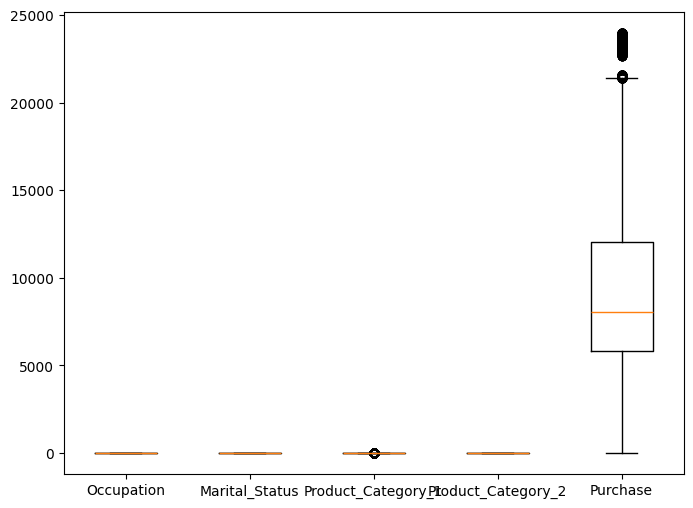

In [11]:
numeric_columns=dataframe1.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(8,6))
plt.boxplot(dataframe1[numeric_columns].values)
plt.xticks(ticks=range(1,len(numeric_columns)+1),labels=numeric_columns)
plt.show()

In [12]:
numeric_columns=dataframe1.select_dtypes(include=['number'])
Q1=numeric_columns.quantile(0.25)
Q3=numeric_columns.quantile(0.75)
IQR=Q3-Q1
lower_threshold=Q1-1.5*IQR
upper_threshold=Q3+1.5*IQR
outliers=((numeric_columns<lower_threshold)|(numeric_columns>upper_threshold)).sum()
total_data_points=numeric_columns.size
total_outliers=outliers.sum()
percentage_outliers=(total_outliers/total_data_points)*100
print("Percentage of outliers",percentage_outliers)

Percentage of outliers 0.24833293338278176


Here the above ouliers are less than 1% so,the outliers are neglisable 

In [13]:
dataframe1.shape

(550068, 9)

In [14]:
dataframe1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969


In [15]:
dataframe1.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [16]:
# checking the age column 
dataframe1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
dataframe1['Age']=dataframe1['Age'].replace("55+",'55')
dataframe1['Age'].unique()

array(['0-17', '55', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

changing the columns dtypes of the Age columns

In [18]:
dataframe1['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4            55
          ...  
550063    51-55
550064    26-35
550065    26-35
550066       55
550067    46-50
Name: Age, Length: 550068, dtype: object

In [19]:
def extract_age(x):
    age_parts = x.split('-')
    if len(age_parts) == 2:  # Check if split operation is successful
        return int(age_parts[1].replace('+', ''))
    else:
        return int(age_parts[0].replace('+', ''))

# Apply the function to 'Age' column
dataframe1['Age'] = dataframe1['Age'].apply(extract_age)

print(dataframe1.dtypes)

Gender                         object
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object


In [20]:
dataframe1['Age']

0         17
1         17
2         17
3         17
4         55
          ..
550063    55
550064    35
550065    35
550066    55
550067    50
Name: Age, Length: 550068, dtype: int64

Using the count plot for the checking of the data of age

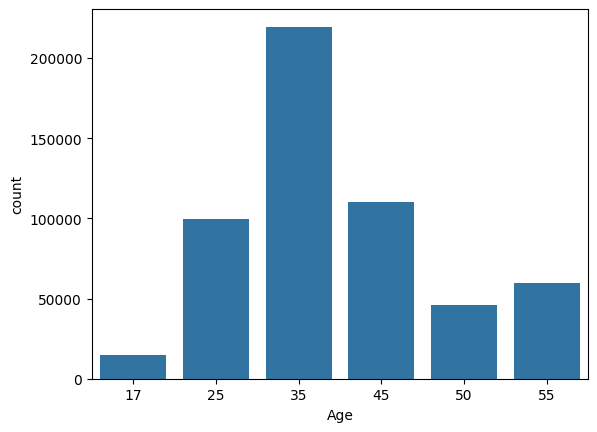

In [21]:
sns.countplot(x=dataframe1['Age'])
plt.show()

 Checking the Stay_In_Current_City_Years column

In [22]:
dataframe1['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
dataframe1['Stay_In_Current_City_Years'].replace("4+","4",inplace=True)

In [24]:
r=dataframe1['Stay_In_Current_City_Years'].value_counts()["4"]
r

84726

In [25]:
dataframe1.dtypes

Gender                         object
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [26]:
dataframe1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,17,10,A,2,0,3,9.0,8370
1,F,17,10,A,2,0,1,6.0,15200
2,F,17,10,A,2,0,12,9.0,1422
3,F,17,10,A,2,0,12,14.0,1057
4,M,55,16,C,4,0,8,9.0,7969


# 6.Using the labelencoding for the checking the correlation of the each columns

In [27]:
label_encoder=LabelEncoder()
dataframe1['Gender'] =label_encoder.fit_transform(dataframe1['Gender'])
dataframe1['City_Category']=label_encoder.fit_transform(dataframe1['City_Category'])
dataframe1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,17,10,0,2,0,3,9.0,8370
1,0,17,10,0,2,0,1,6.0,15200
2,0,17,10,0,2,0,12,9.0,1422
3,0,17,10,0,2,0,12,14.0,1057
4,1,55,16,2,4,0,8,9.0,7969


# 7.Here  checking the correlation of the each columns

In [28]:
data=dataframe1.corr()
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender,1.000000,-0.003150,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.014051,0.060346
Age,-0.003150,1.000000,0.096812,0.102825,-0.002128,0.312095,0.059216,0.044192,0.016670
Occupation,0.117291,0.096812,1.000000,0.034479,0.030005,0.024280,-0.007618,0.000557,0.020833
City_Category,-0.004515,0.102825,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.006888,0.061914
Stay_In_Current_City_Years,0.014660,-0.002128,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001087,0.005422
Marital_Status,-0.011603,0.312095,0.024280,0.039790,-0.012819,1.000000,0.019888,0.011526,-0.000463
Product_Category_1,-0.045594,0.059216,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.331691,-0.343703
Product_Category_2,-0.014051,0.044192,0.000557,-0.006888,-0.001087,0.011526,0.331691,1.000000,-0.156676
Purchase,0.060346,0.016670,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.156676,1.000000


# 7.1.Using the heatmap to find the correlation of the dataframe1

<Axes: >

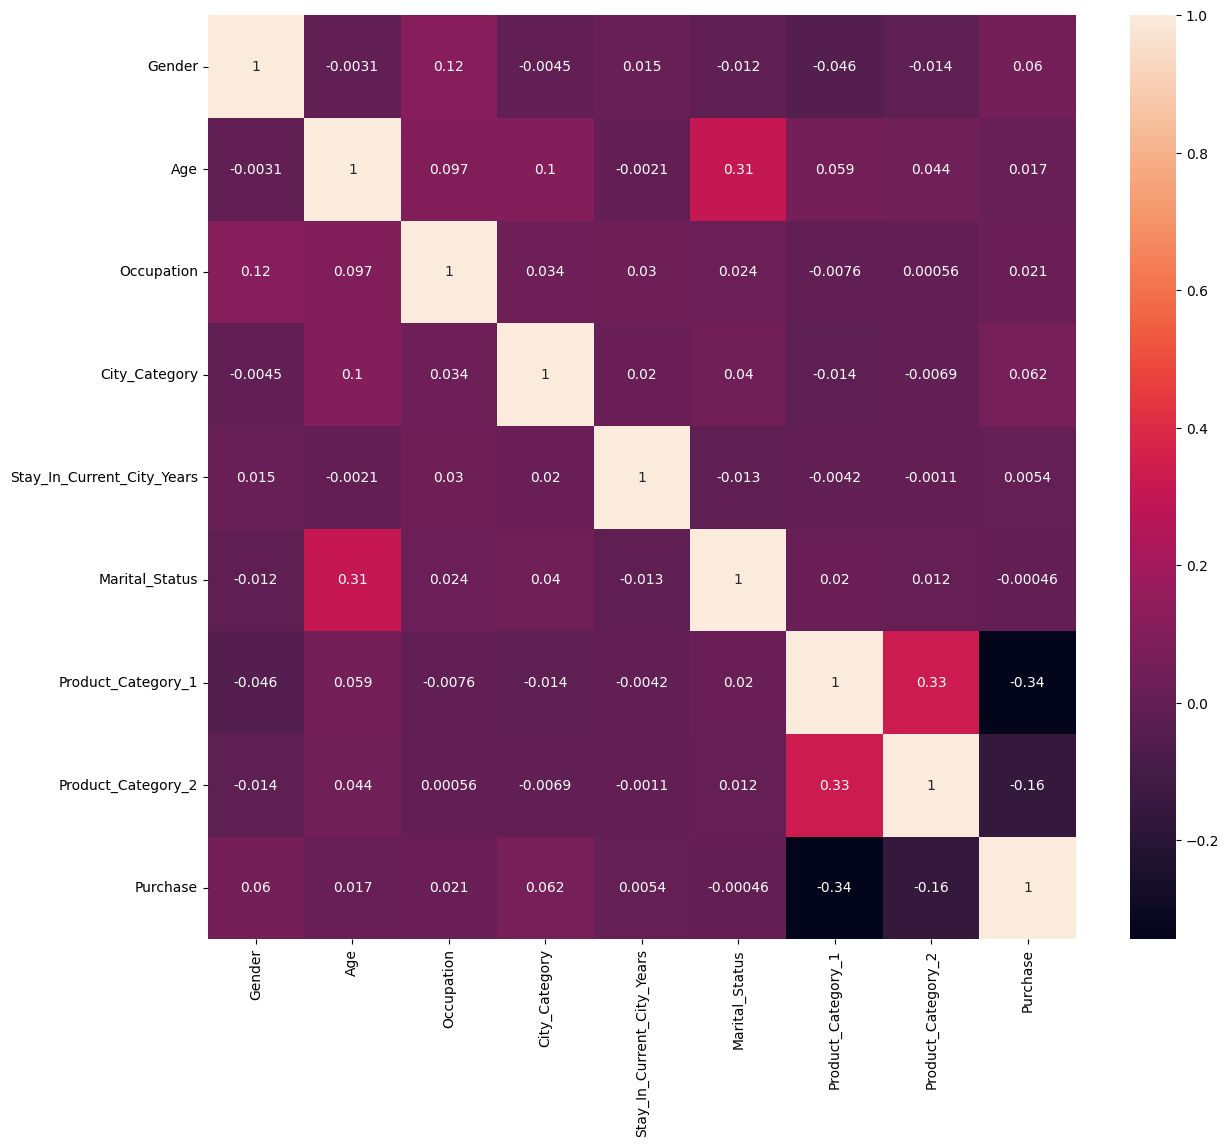

In [29]:
plt.figure(figsize=(14,12))
sns.heatmap(data, annot=True)

---> The above columns is checking the correlation of each column and the above columns Matital_Status column getting low correlation of the target variabel that way the columns is dropped

In [30]:
dataframe1.drop(columns=['Marital_Status'],axis=1,inplace=True)
dataframe1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Purchase
0,0,17,10,0,2,3,9.0,8370
1,0,17,10,0,2,1,6.0,15200
2,0,17,10,0,2,12,9.0,1422
3,0,17,10,0,2,12,14.0,1057
4,1,55,16,2,4,8,9.0,7969


# 8.checking the skewness 

-->The column name product_category_1 is having the skewness ,using the log to reduce the skewness

In [31]:
dataframe1.skew()

Gender                       -1.173946
Age                           0.048869
Occupation                     0.40014
City_Category                -0.071392
Stay_In_Current_City_Years    0.317236
Product_Category_1            1.025735
Product_Category_2           -0.007714
Purchase                       0.60014
dtype: object

In [32]:
dataframe1.Product_Category_1 = np.log(dataframe1.Product_Category_1)


In [33]:
dataframe1.skew()

Gender                       -1.173946
Age                           0.048869
Occupation                     0.40014
City_Category                -0.071392
Stay_In_Current_City_Years    0.317236
Product_Category_1           -0.459805
Product_Category_2           -0.007714
Purchase                       0.60014
dtype: object

In [34]:
dataframe1.head()
dataframe1.shape

(550068, 8)

In [35]:
dataframe1['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

# 9.Models

---> Here creating the one function to checking the all regresssion algorithms accuracy

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Assuming 'dataframe1' contains your dataset

# Split the data into features (X) and target variable (y)
X = dataframe1.drop(columns=['Purchase'])  # Assuming 'target_column' is the name of your target variable
y = dataframe1['Purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE, MAE, RMSE, and R2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)  # RMSE is calculated as the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 19458074.42399647
Mean Absolute Error (MAE): 3303.6218424572376
Root Mean Squared Error (RMSE): 4411.13074211097
R-squared (R2): 0.22558564546422877


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def train_regression_models(dataframe1):
    # Assuming the last column is the target variable
    X = dataframe1.iloc[:, :-1]
    y = dataframe1.iloc[:, -1]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(random_state=42)
    }

    trained_models = {}

    # Train models and collect metrics
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        trained_models[name] = {
            'model': model,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'r2': r2
        }

    return trained_models

# Example usage:
# Assuming 'dataframe1' is your DataFrame containing the regression dataset
# trained_models = train_regression_models(dataframe1)
# for name, metrics in trained_models.items():
#     print(f"{name}:")
#     for metric_name, value in metrics.items():
#         print(f"\t{metric_name}: {value}")


In [38]:
# Example usage:
trained_models = train_regression_models(dataframe1)
for name, metrics in trained_models.items():
    print(f"Model: {name}")
    print(f"\tMean Squared Error (MSE): {metrics['mse']}")
    print(f"\tMean Absolute Error (MAE): {metrics['mae']}")
    print(f"\tRoot Mean Squared Error (RMSE): {metrics['rmse']}")
    print(f"\tR-squared (R2): {metrics['r2']}")


Model: Linear Regression
	Mean Squared Error (MSE): 19458074.42399647
	Mean Absolute Error (MAE): 3303.6218424572376
	Root Mean Squared Error (RMSE): 4411.13074211097
	R-squared (R2): 0.22558564546422877
Model: Random Forest Regressor
	Mean Squared Error (MSE): 9187659.404550403
	Mean Absolute Error (MAE): 2222.835112461624
	Root Mean Squared Error (RMSE): 3031.115208062934
	R-squared (R2): 0.6343391862714411
